# **1. SETUP AND LIBRARIES**

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve
)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# **2. LOAD DATA**

In [2]:
file_path = "WA_Fn-UseC_-Telco-Customer-Churn.csv"

df = pd.read_csv(file_path)

print("Dataset shape:", df.shape)
df.head()

Dataset shape: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# **3. BASIC DATA INSPECTION**

In [3]:
df.info()

# Basic statistics for numeric features
df.describe()

# Check class distribution for Churn
print(df["Churn"].value_counts())
print(df["Churn"].value_counts(normalize=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# **4. DATA CLEANING AND PREPARATION**

In [4]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

In [5]:
print(df.isnull().sum())

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [6]:
df = df.dropna(subset=["TotalCharges"])

In [7]:
print("Shape after dropping missing TotalCharges:", df.shape)

Shape after dropping missing TotalCharges: (7032, 21)


In [8]:
df = df.drop(columns=["customerID"])

In [9]:
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

In [10]:
X = df.drop("Churn", axis=1)
y = df["Churn"]

In [11]:
numeric_features = ["tenure", "MonthlyCharges", "TotalCharges"]
categorical_features = [col for col in X.columns if col not in numeric_features]

In [12]:
print("Numeric features:", numeric_features)
print("Categorical features:", categorical_features)

Numeric features: ['tenure', 'MonthlyCharges', 'TotalCharges']
Categorical features: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


# **5. TRAIN–TEST SPLIT**

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (5625, 19)
Test shape: (1407, 19)


# **6. PREPROCESSING PIPELINE**

In [14]:
numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(drop="first", handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

# **7. EXPLORATORY DATA ANALYSIS (EDA)**

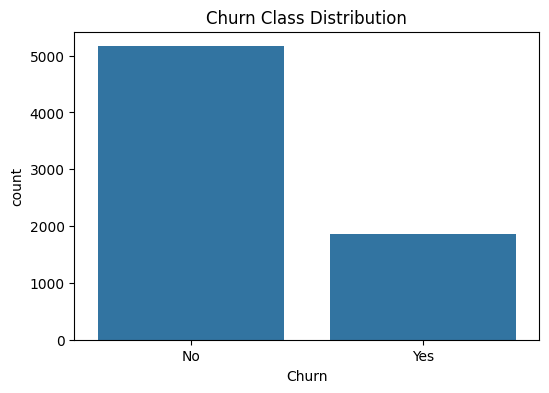

In [15]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Churn")
plt.title("Churn Class Distribution")
plt.xticks([0, 1], ["No", "Yes"])
plt.show()

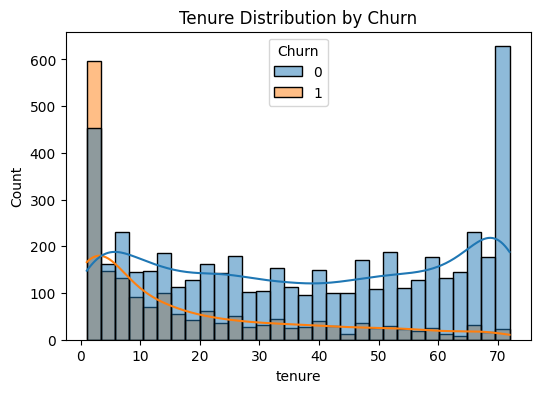

In [16]:
plt.figure(figsize=(6,4))
sns.histplot(data=df, x="tenure", hue="Churn", bins=30, kde=True)
plt.title("Tenure Distribution by Churn")
plt.show()

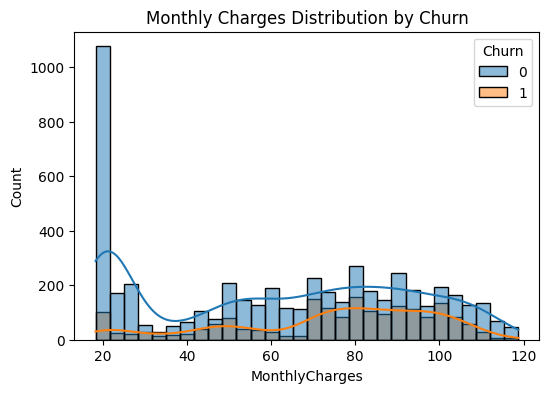

In [17]:
plt.figure(figsize=(6,4))
sns.histplot(data=df, x="MonthlyCharges", hue="Churn", bins=30, kde=True)
plt.title("Monthly Charges Distribution by Churn")
plt.show()

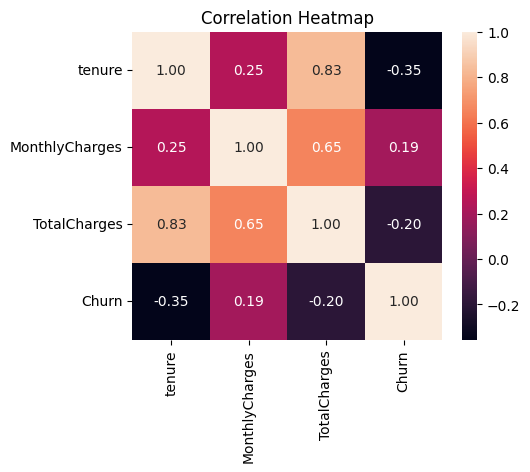

In [18]:
plt.figure(figsize=(5,4))
corr = df[["tenure", "MonthlyCharges", "TotalCharges", "Churn"]].corr()
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# **8. BASELINE MODEL: LOGISTIC REGRESSION**

In [19]:
log_reg_clf = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000))
])

# Train the model
log_reg_clf.fit(X_train, y_train)

# Predictions
y_pred_lr = log_reg_clf.predict(X_test)
y_proba_lr = log_reg_clf.predict_proba(X_test)[:, 1]

# Evaluation
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
roc_auc_lr = roc_auc_score(y_test, y_proba_lr)

print("Logistic Regression Metrics")
print("Accuracy:", round(accuracy_lr, 4))
print("Precision:", round(precision_lr, 4))
print("Recall:", round(recall_lr, 4))
print("F1 Score:", round(f1_lr, 4))
print("ROC AUC:", round(roc_auc_lr, 4))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr, target_names=["No Churn", "Churn"]))

Logistic Regression Metrics
Accuracy: 0.8045
Precision: 0.6505
Recall: 0.5722
F1 Score: 0.6088
ROC AUC: 0.8361

Classification Report:
              precision    recall  f1-score   support

    No Churn       0.85      0.89      0.87      1033
       Churn       0.65      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407



# **9. DECISION TREE CLASSIFIER**

In [20]:
dt_clf = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", DecisionTreeClassifier(random_state=42))
])

dt_clf.fit(X_train, y_train)

y_pred_dt = dt_clf.predict(X_test)
y_proba_dt = dt_clf.predict_proba(X_test)[:, 1]

accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
roc_auc_dt = roc_auc_score(y_test, y_proba_dt)

print("Decision Tree Metrics")
print("Accuracy:", round(accuracy_dt, 4))
print("Precision:", round(precision_dt, 4))
print("Recall:", round(recall_dt, 4))
print("F1 Score:", round(f1_dt, 4))
print("ROC AUC:", round(roc_auc_dt, 4))

Decision Tree Metrics
Accuracy: 0.7065
Precision: 0.4477
Recall: 0.4465
F1 Score: 0.4471
ROC AUC: 0.6233


# **10. RANDOM FOREST CLASSIFIER (WITH SIMPLE GRID SEARCH)**

In [21]:
rf_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(random_state=42))
])

# Hyperparameter grid for Random Forest
param_grid = {
    "classifier__n_estimators": [100, 200],
    "classifier__max_depth": [None, 10, 20],
    "classifier__min_samples_split": [2, 5],
}

grid_search = GridSearchCV(
    rf_pipeline,
    param_grid,
    cv=3,
    scoring="f1",
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

print("Best parameters for Random Forest:", grid_search.best_params_)

best_rf = grid_search.best_estimator_

y_pred_rf = best_rf.predict(X_test)
y_proba_rf = best_rf.predict_proba(X_test)[:, 1]

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_proba_rf)

print("Random Forest Metrics")
print("Accuracy:", round(accuracy_rf, 4))
print("Precision:", round(precision_rf, 4))
print("Recall:", round(recall_rf, 4))
print("F1 Score:", round(f1_rf, 4))
print("ROC AUC:", round(roc_auc_rf, 4))

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best parameters for Random Forest: {'classifier__max_depth': 10, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}
Random Forest Metrics
Accuracy: 0.7932
Precision: 0.6416
Recall: 0.5027
F1 Score: 0.5637
ROC AUC: 0.834


# **11. CONFUSION MATRICES FOR MODEL COMPARISON**

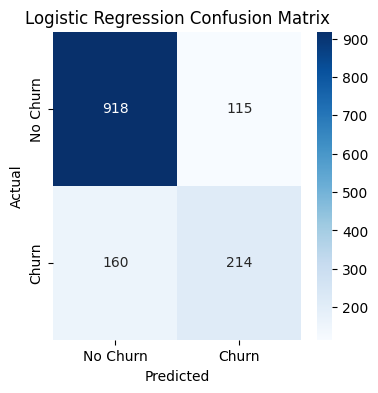

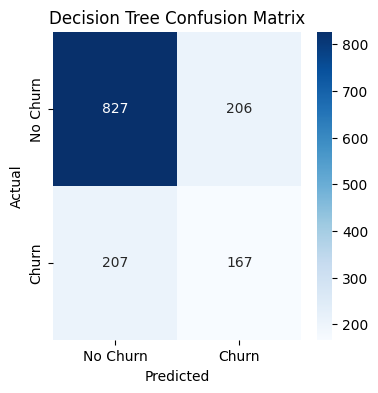

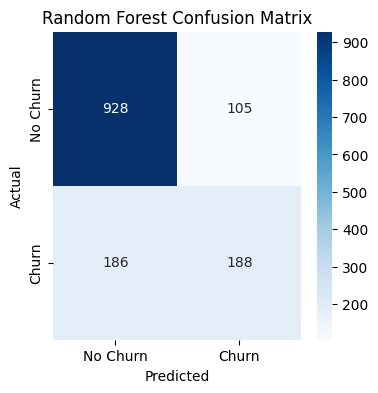

In [22]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["No Churn", "Churn"],
                yticklabels=["No Churn", "Churn"])
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.title(title)
    plt.show()

plot_confusion_matrix(y_test, y_pred_lr, "Logistic Regression Confusion Matrix")
plot_confusion_matrix(y_test, y_pred_dt, "Decision Tree Confusion Matrix")
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest Confusion Matrix")

# **12. ROC CURVE COMPARISON**

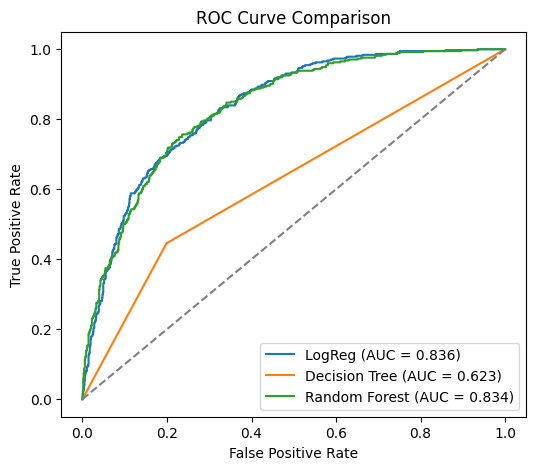

In [23]:
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_proba_dt)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)

plt.figure(figsize=(6,5))
plt.plot(fpr_lr, tpr_lr, label=f"LogReg (AUC = {roc_auc_lr:.3f})")
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {roc_auc_dt:.3f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.3f})")
plt.plot([0,1], [0,1], linestyle="--", color="grey")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

# **13. FEATURE IMPORTANCE FROM RANDOM FOREST**

In [24]:
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['tenure', 'MonthlyCharges', 'TotalCharges']),
                                ('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'))]),
                                 ['gender', 'SeniorCitizen', 'Partner',
                                  'Dependents', 'PhoneService', 'MultipleLines',
                                  'InternetService', 'OnlineSecurity',
                                  'OnlineBackup', 'DeviceProtection',
                                  'TechSupport', 'StreamingTV',
                                  'StreamingMovies', 'Contract',
                                  'PaperlessBilling', 'PaymentMethod'])])

In [25]:
X_train_processed = preprocessor.transform(X_train)

rf_direct = RandomForestClassifier(
    n_estimators=grid_search.best_params_["classifier__n_estimators"],
    max_depth=grid_search.best_params_["classifier__max_depth"],
    min_samples_split=grid_search.best_params_["classifier__min_samples_split"],
    random_state=42
)

rf_direct.fit(X_train_processed, y_train)

ohe = preprocessor.named_transformers_["cat"]["onehot"]
ohe_feature_names = ohe.get_feature_names_out(categorical_features)

all_feature_names = numeric_features + list(ohe_feature_names)

importances = rf_direct.feature_importances_
fi_df = pd.DataFrame({
    "feature": all_feature_names,
    "importance": importances
}).sort_values(by="importance", ascending=False)

fi_df.head(20)

,feature,importance
0,tenure,0.195843
2,TotalCharges,0.161929
1,MonthlyCharges,0.116299
10,InternetService_Fiber optic,0.066425
25,Contract_Two year,0.060533
28,PaymentMethod_Electronic check,0.058451
24,Contract_One year,0.036279
13,OnlineSecurity_Yes,0.035615
19,TechSupport_Yes,0.022948
26,PaperlessBilling_Yes,0.019503


# **14. PLOT TOP 10 MOST IMPORTANT FEATURES**

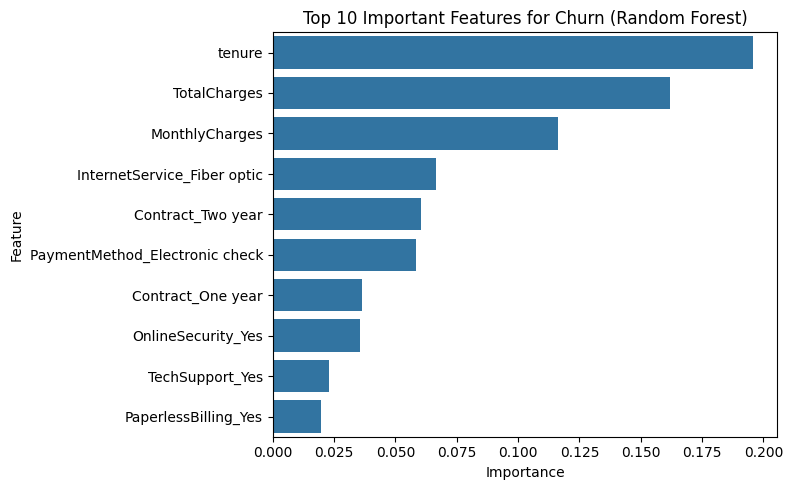

In [26]:
top_n = 10
top_features = fi_df.head(top_n)

plt.figure(figsize=(8,5))
sns.barplot(data=top_features, x="importance", y="feature")
plt.title("Top 10 Important Features for Churn (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()